In [1]:
import sys
# Append the previous directory to the path
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd
from exp_utils import CounterPlotNice
# Load company_bankruptcy_pred.csv dataset
df = pd.read_csv('./company_bankruptcy_pred.csv')
df = df.iloc[:, [0, 16, 91, 34, 42, 85, 18, 64, 39, 29, 89]]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Bankrupt?']), df['Bankrupt?'], test_size=0.2, random_state=42)

In [4]:
# Import RF Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Print feature importance
print(model.feature_importances_)

# get the index of the 10 most important features
most_imp = np.argsort(model.feature_importances_)[-10:]

[0.13468095 0.14323412 0.12683116 0.10739721 0.00090389 0.11858486
 0.08637834 0.09430998 0.0889164  0.09876307]


In [6]:
# Print prediction AUC
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.9069784806534953


In [7]:
# Select wrong classified instances
wbc_wrong = np.where(model.predict(X_test) != y_test)[0]

In [8]:
wbc_wrong

array([   3,   29,   37,   47,   65,   67,   68,  104,  105,  110,  120,
        125,  144,  145,  160,  259,  271,  277,  280,  316,  363,  406,
        438,  507,  512,  519,  554,  557,  574,  633,  634,  636,  736,
        764,  770,  793,  817,  856,  881,  890,  976,  978,  994, 1007,
       1079, 1093, 1124, 1238, 1246, 1261, 1272])

In [9]:
# Get wbc feature names
wbc_feature_names = df.drop(columns=['Bankrupt?']).columns
# Get class names
wbc_class_names = {0: 'Healthy', 1: 'Bankrupt'}

In [10]:
wbc_nice_cf = CounterPlotNice(
    predict_fn=model.predict_proba,
    X_train=X_train.to_numpy(),
    y_train=y_train.to_numpy(),
    cat_feat=[])

/home/rmazzine/anaconda3/envs/countershapleyExp/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [11]:
import warnings
# Remove but RandomForestClassifier was fitted with feature names error
warnings.filterwarnings("ignore", category=UserWarning)

In [12]:
model.predict(np.array([X_test.to_numpy()[wbc_wrong[45]]]))

array([0])

In [13]:
y_test.iloc[wbc_wrong[45]]

1

In [14]:
exp_wrong = wbc_nice_cf.explain(np.array([X_test.to_numpy()[wbc_wrong[45]]]), wbc_feature_names, wbc_class_names)

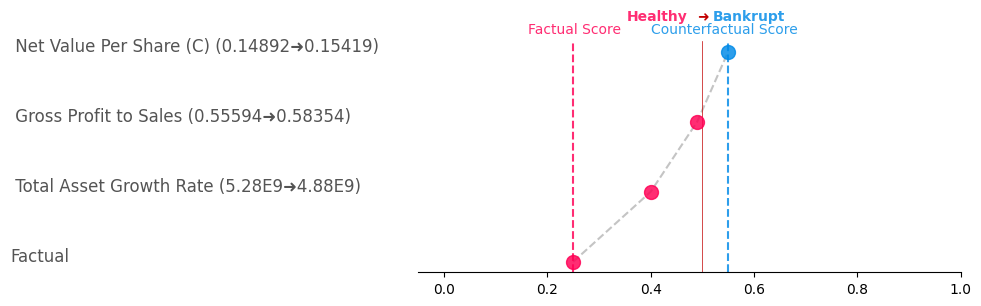

In [18]:
exp_wrong[0].greedy()

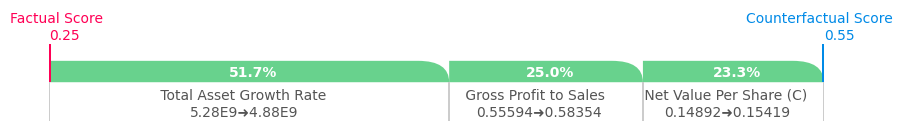

In [19]:
exp_wrong[0].countershapley()

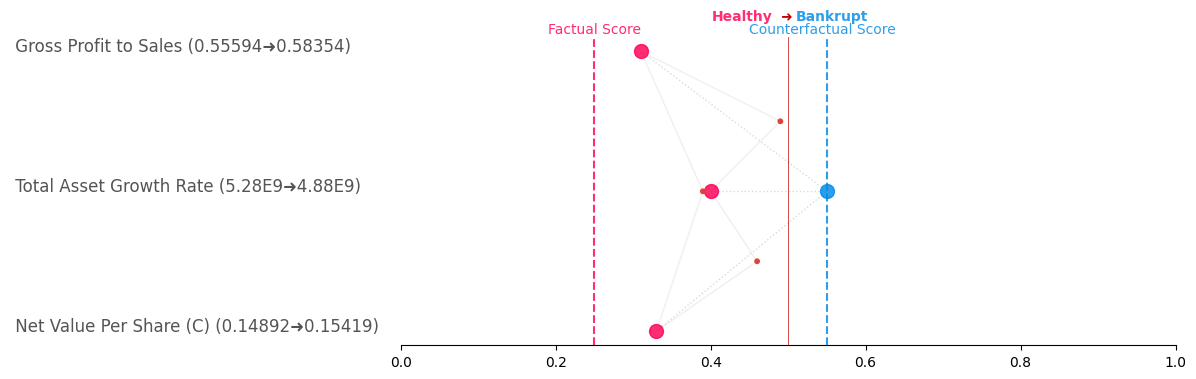

In [20]:
exp_wrong[0].constellation()